# 三层BP神经网络实现鲍鱼年龄预测

### 小组成员：温紫珺、谭力仁、沈旭阳、邹子涵

## 导包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

## 数据集解释以及读取

数据集来源：UCI数据集库：https://archive.ics.uci.edu/ml/index.php  

名称/数据类型/度量单位/描述  
-----------------------------  
性别/名义/-/ M，F和I（婴儿）  
长度/连续/毫米/最长的外壳尺寸  
直径/连续/毫米/垂直于长度  
高度/连续/毫米/带有外壳的肉总  
重/连续/克/整个鲍鱼  
剥皮重量/连续/克/重量肉  
内脏重量/连续/克/肠重量（出血后）  
蛋壳重量/连续/克/干后  
环/整数/-/ +1.5给出年龄（以年为单位）  

In [2]:
data = pd.read_csv('abalone.data',header=None,names=['sex','length','diameter','height','wholeweight','shuckedweight','visceraweight','shellweight','rings'])

In [3]:
data

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.iloc[:,0].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [5]:
data.loc[(data['sex']=='F'),'sex'] = 0
data.loc[(data['sex']=='M'),'sex'] = 1
data.loc[(data['sex']=='I'),'sex'] = 2

In [6]:
data = data.astype('float64')

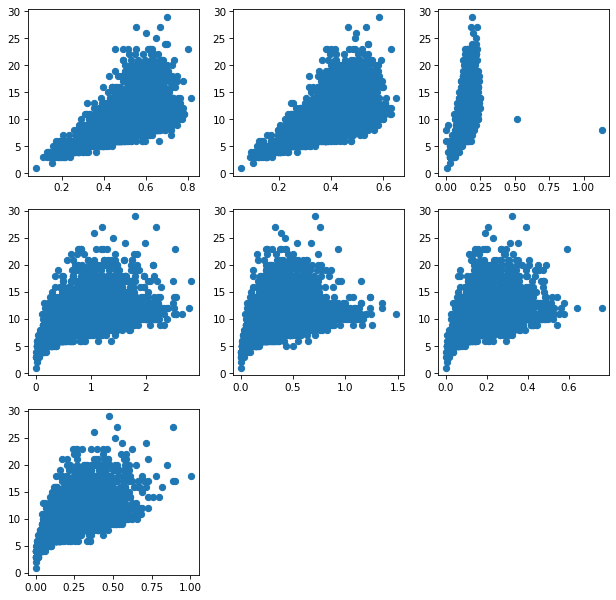

In [7]:
p = plt.figure(figsize=(10,10),dpi=75)
p.add_subplot(3,3,1)
plt.scatter(data.length,data.rings)
p.add_subplot(3,3,2)
plt.scatter(data.diameter,data.rings)
p.add_subplot(3,3,3)
plt.scatter(data.height,data.rings)
p.add_subplot(3,3,4)
plt.scatter(data.wholeweight,data.rings)
p.add_subplot(3,3,5)
plt.scatter(data.shuckedweight,data.rings)
p.add_subplot(3,3,6)
plt.scatter(data.visceraweight,data.rings)
p.add_subplot(3,3,7)
plt.scatter(data.shellweight,data.rings)

In [8]:
data_feature = data.iloc[:,:-1]
data_label = data.iloc[:,-1]

In [9]:
train_feature,test_feature,train_label,test_label = train_test_split(data_feature,data_label,test_size=0.2,random_state=0)

In [10]:
train_feature.head()

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight
3141,2.0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100
3521,2.0,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125
883,1.0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530
3627,1.0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305
2106,1.0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650


In [11]:
train_feature.shape

(3341, 8)

In [12]:
train_label.head()

3141     5.0
3521     3.0
883     15.0
3627    10.0
2106    14.0
Name: rings, dtype: float64

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=(8,),activation='relu'))
# model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
             loss='mse')

In [16]:
history = model.fit(train_feature,train_label,epochs=500)

Epoch 1/500
105/105 [==============================] - 0s 4ms/step - loss: 120.9276
Epoch 2/500
105/105 [==============================] - 0s 4ms/step - loss: 85.7140
Epoch 3/500
105/105 [==============================] - 0s 4ms/step - loss: 54.8245
Epoch 4/500
105/105 [==============================] - 0s 4ms/step - loss: 32.0938
Epoch 5/500
105/105 [==============================] - 0s 4ms/step - loss: 18.6312
Epoch 6/500
105/105 [==============================] - 0s 4ms/step - loss: 12.7133
Epoch 7/500
105/105 [==============================] - 0s 4ms/step - loss: 10.7941
Epoch 8/500
105/105 [==============================] - 0s 4ms/step - loss: 10.2059
Epoch 9/500
105/105 [==============================] - 0s 4ms/step - loss: 9.9177
Epoch 10/500
105/105 [==============================] - 0s 4ms/step - loss: 9.6686
Epoch 11/500
105/105 [==============================] - 0s 4ms/step - loss: 9.4527
Epoch 12/500
105/105 [==============================] - 0s 4ms/step - loss: 9.2708
Epoc

In [17]:
model.predict(test_feature)

array([[13.59464  ],
       [ 9.191061 ],
       [10.514076 ],
       [ 4.866915 ],
       [10.743575 ],
       [11.505263 ],
       [ 8.007568 ],
       [10.025414 ],
       [ 8.139389 ],
       [12.147755 ],
       [ 8.139097 ],
       [ 5.65375  ],
       [ 9.071959 ],
       [ 9.342208 ],
       [ 5.1031914],
       [ 9.523028 ],
       [ 8.030606 ],
       [13.78377  ],
       [11.01853  ],
       [ 7.48169  ],
       [ 7.04798  ],
       [ 6.538898 ],
       [ 8.725041 ],
       [ 7.887062 ],
       [10.131149 ],
       [11.619433 ],
       [ 5.0569577],
       [13.134049 ],
       [10.121317 ],
       [11.96248  ],
       [ 8.212267 ],
       [ 3.9596076],
       [11.265936 ],
       [12.64503  ],
       [ 6.862881 ],
       [ 8.684897 ],
       [ 8.470806 ],
       [ 9.626695 ],
       [ 8.077546 ],
       [11.322809 ],
       [11.656126 ],
       [ 9.973763 ],
       [12.138917 ],
       [12.100661 ],
       [12.023204 ],
       [ 9.623998 ],
       [ 8.923302 ],
       [11.50

In [18]:
test_label

668     13.0
1580     8.0
3784    11.0
463      5.0
2615    12.0
        ... 
575     11.0
3231    12.0
1084     7.0
290     17.0
2713     4.0
Name: rings, Length: 836, dtype: float64